## 参考

* https://www.slideshare.net/KenjiUrai/explanation-of-gpr
    * 式の展開
    * カーネルを使う

In [6]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [22]:
def inv(X):
    return np.linalg.inv(X)

def norm(x):
    return np.linalg.norm(x)

def kernel(x, y, a=1, b=1):
    return a*np.exp(-b*0.5*norm(x-y)**2)

def K(X, a=1, b=1):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j],a, b) 
    return KM

def k(X_h, X, a=1, b=1):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i],a, b) 
    return kM

def k_(X, a=1, b=1):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i], a, b)
    return kv

def grad(X, a=1, b=1):
    N = X.shape[1]
    GA, GB = np.zeros((N,N)), np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            diff = norm(X[:,i]-X[:,j])**2
            GA[i,j] = np.exp(-0.5*b*diff)
            GB[i,j] = -0.5*a*b*diff*GA[i,j]
    return GA, GB

def update(y, C, G):
    return -0.5*np.trace(C.dot(G))+0.5*y.T.dot(C.dot(G.dot(C.dot(y))))

In [28]:
# data,target= load_iris().data,load_iris().target
# print(data.shape, target.shape)
# plt.subplot(121)
# plt.scatter(data[:,0], target)
# plt.subplot(122)
# plt.scatter(data[:,1], target)
num = 100
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)]).T
target = np.sin(data[:,0])+np.cos(data[:,1])+np.random.rand(len(data))

sample = random.sample(range(len(data)),k=len(data))
sample_num = 25
X = data[sample[:sample_num],0:2].T.reshape(2,-1)
y = target[sample[:sample_num]].reshape(-1,1)

[[ 2.87756151]] [[ 2.75389478]]
[[ 2.7558849]] [[ 2.51329675]]
[[ 2.63524094]] [[ 2.27842961]]
[[ 2.51595189]] [[ 2.04955053]]
[[ 2.39840464]] [[ 1.8269929]]
[[ 2.28306661]] [[ 1.6112129]]
[[ 2.17050578]] [[ 1.40283573]]
[[ 2.06141893]] [[ 1.20272111]]
[[ 1.95666917]] [[ 1.01207955]]
[[ 1.85731957]] [[ 0.83258759]]
[[ 1.76464532]] [[ 0.66633792]]
[[ 1.68016337]] [[ 0.51571573]]
[[ 1.60579816]] [[ 0.38394784]]
[[ 1.54421405]] [[ 0.27704444]]
[[ 1.49874938]] [[ 0.20613907]]
[[ 1.46990181]] [[ 0.17916264]]
[[ 1.44966922]] [[ 0.17654994]]
[[ 1.43105348]] [[ 0.17746976]]
[[ 1.41295355]] [[ 0.17853492]]
[[ 1.39533498]] [[ 0.17959639]]
[[ 1.37820931]] [[ 0.18064679]]
[[ 1.36158875]] [[ 0.18168411]]
[[ 1.34548424]] [[ 0.1827066]]
[[ 1.32990527]] [[ 0.18371256]]
[[ 1.31485978]] [[ 0.18470031]]
[[ 1.30035404]] [[ 0.18566825]]
[[ 1.28639259]] [[ 0.18661482]]
[[ 1.27297818]] [[ 0.18753859]]
[[ 1.26011169]] [[ 0.18843818]]
[[ 1.24779221]] [[ 0.18931238]]
[[ 1.23601694]] [[ 0.19016007]]
[[ 1.2247813

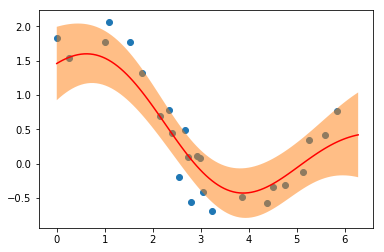

In [29]:
X_h = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)])

sg = 1
a, b = 3, 3
lr = 0.1

for i in range(50):
    # カーネル計算
    C_M = inv(K(X, a, b)+sg*np.eye(X.shape[1],X.shape[1]))
    k_M = k(X_h, X, a, b)
    k_V = k_(X_h, a, b)
    
    # ハイパーパラメータの更新
    GA, GB = grad(X, a, b)
    a += lr*update(y, C_M, GA)
    b += lr*update(y, C_M, GB)
    print(a, b)
    
# 平均値と分布
yh_mean = k_M.T.dot(C_M).dot(y)
yh_std = np.sqrt(k_V - np.diag(k_M.T.dot(C_M).dot(k_M)).reshape(-1,1))

# plot
plt.plot(X_h[0,:],yh_mean,c="red")
plt.scatter(X[0,:], y)
plt.fill_between(X_h[0,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)